## Agenda 
1. AR Models
2. MA Models
3. ARMA Models
4. ARIMA Models

## Autoregressive Models (AR)

An autoregressive (AR) model is when a value from a time series is regressed on previous values from the same time series.

In words, the mathematical idea is the following:

$$ \text{Today = constant + slope} \times \text{yesterday + noise} $$

Or, mathematically:
$$\large Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

In [23]:
# Make Some Data
import numpy as np
import pandas as pd
np.random.seed(11)
n = 12*10
constant = 8
slope = 0.7
noise_weight = 1
noise = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(constant + slope*(data[i-1] - constant) + noise[i] if i>1 else constant + slope + noise[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

In [24]:
import matplotlib.pyplot as plt 

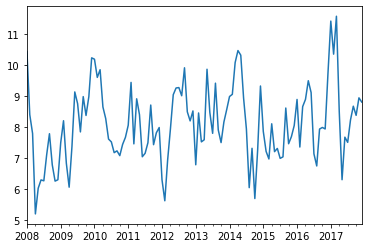

In [25]:
time_series.plot()

In [7]:
from statsmodels.tsa.arima_model import ARMA 

In [8]:
ar_model = ARMA(time_series, order = (1, 0)).fit()
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(1, 0)   Log Likelihood                -167.106
Method:                       css-mle   S.D. of innovations              0.972
Date:                Wed, 25 Nov 2020   AIC                            340.213
Time:                        12:12:00   BIC                            348.575
Sample:                    01-31-2008   HQIC                           343.609
                         - 12-31-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1494      0.222     36.755      0.000       7.715       8.584
ar.L1.y        0.6042      0.074      8.199      0.000       0.460       0.749
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6550           +0.0000j            1.6550            0.0000
-----------------------------------------------------------------------------
"""

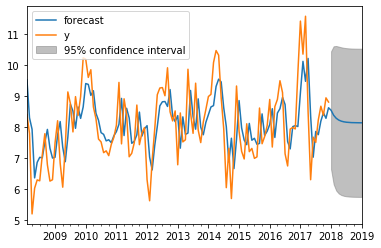

In [10]:
ar_model.plot_predict(1, n+12);

In [14]:
ar_model.predict(1, n+12)['2017-12-31':]

2017-12-31    8.636624
2018-01-31    8.554452
2018-02-28    8.394167
2018-03-31    8.297316
2018-04-30    8.238795
2018-05-31    8.203434
2018-06-30    8.182067
2018-07-31    8.169156
2018-08-31    8.161355
2018-09-30    8.156641
2018-10-31    8.153793
2018-11-30    8.152072
2018-12-31    8.151032
2019-01-31    8.150404
Freq: M, dtype: float64

In [15]:
time_series.tail()

2017-08-31    8.242136
2017-09-30    8.686048
2017-10-31    8.390830
2017-11-30    8.955710
2017-12-31    8.819719
Freq: M, dtype: float64

$$\large Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

In [16]:
ar_model.params

const      8.149444
ar.L1.y    0.604241
dtype: float64

In [19]:
ar_model.params['const'] + (ar_model.params['ar.L1.y'] * (time_series['2017-12-31'] - ar_model.params['const']))

8.554452357493465

#### AR(2)

Today = constant + slope_1 x yesterday + slope_2 x 2_days_ago + noise 

In [26]:
ar_model_2 = ARMA(time_series, order = (2, 0)).fit()
ar_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(2, 0)   Log Likelihood                -166.920
Method:                       css-mle   S.D. of innovations              0.971
Date:                Wed, 25 Nov 2020   AIC                            341.841
Time:                        12:19:46   BIC                            352.991
Sample:                    01-31-2008   HQIC                           346.369
                         - 12-31-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1450      0.210     38.759      0.000       7.733       8.557
ar.L1.y        0.6385      0.093      6.899      0.000       0.457       0.820
ar.L2.y       -0.0565      0.093     -0.611      0.543      -0.238       0.125
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8783           +0.0000j            1.8783            0.0000
AR.2            9.4257           +0.0000j            9.4257            0.0000
-----------------------------------------------------------------------------
"""

In [27]:
ar_model.aic

340.2128061935483

In [28]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(time_series, test_size = 0.3)

In [29]:
df = pd.DataFrame()
df['original'] = time_series
df['train'] = train
df['test'] = test

In [30]:
df.head(20)

,original,train,test
2008-01-31,10.449455,10.449455,NaN
2008-02-29,8.413927,8.413927,NaN
2008-03-31,7.805184,7.805184,NaN
2008-04-30,5.210310,5.210310,NaN
2008-05-31,6.038932,6.038932,NaN
2008-06-30,6.307621,6.307621,NaN
2008-07-31,6.278706,6.278706,NaN
2008-08-31,7.110497,NaN,7.110497
2008-09-30,7.798398,7.798398,NaN
2008-10-31,6.793276,6.793276,NaN


In [33]:
train = time_series[:-24]
test = time_series[-24:]
train.shape, test.shape

((96,), (24,))

In [34]:
df['train_1'] = train
df['test_1'] = test

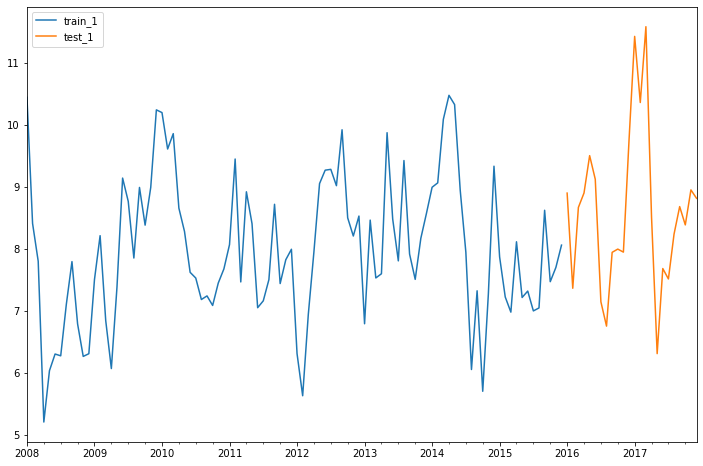

In [35]:
df[['train_1', 'test_1']].plot(kind = 'line', figsize = (12, 8))

In [36]:
from sklearn.metrics import mean_squared_error

In [39]:
ar_model_1 = ARMA(train, order = (1, 0)).fit()
predictions = ar_model_1.forecast(24)[0]

ar_model_2 = ARMA(train, order = (2, 0)).fit()
predictions_2 = ar_model_2.forecast(24)[0]

In [40]:
mean_squared_error(test, predictions)

1.9387372313837423

In [41]:
mean_squared_error(test, predictions_2)

1.9392437676954446

## Moving Average Models (MA)

The Moving Average model can be described as the weighted sum of today's and yesterday's noise.

In words, the mathematical idea is the following:

Today = Mean + Noise + Slope×yesterday's noise
 
Or, mathematically:

$$\large 𝑌𝑡=𝜇+𝜖𝑡+𝜃∗𝜖𝑡−1$$

In [43]:
# create data 
n = 12*10
mu = 8
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + theta*errors[i-1] + errors[i] if i>1 else mu + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

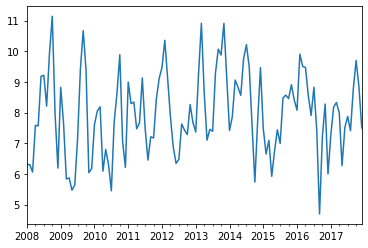

In [44]:
time_series.plot()

In [45]:
ma_model = ARMA(time_series, order = (0, 1)).fit()
ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(0, 1)   Log Likelihood                -169.383
Method:                       css-mle   S.D. of innovations              0.986
Date:                Wed, 25 Nov 2020   AIC                            344.767
Time:                        12:32:02   BIC                            353.129
Sample:                    01-31-2008   HQIC                           348.163
                         - 12-31-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9374      0.170     46.691      0.000       7.604       8.271
ma.L1.y        0.8963      0.042     21.168      0.000       0.813       0.979
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.1157           +0.0000j            1.1157            0.5000
-----------------------------------------------------------------------------
"""

In [47]:
ma_model.predict(1, n+12)['2017-12-31':]

2017-12-31    7.785746
2018-01-31    7.679887
2018-02-28    7.937382
2018-03-31    7.937382
2018-04-30    7.937382
2018-05-31    7.937382
2018-06-30    7.937382
2018-07-31    7.937382
2018-08-31    7.937382
2018-09-30    7.937382
2018-10-31    7.937382
2018-11-30    7.937382
2018-12-31    7.937382
2019-01-31    7.937382
Freq: M, dtype: float64

In [48]:
time_series.tail()

2017-08-31    7.409072
2017-09-30    8.775402
2017-10-31    9.699222
2017-11-30    8.846099
2017-12-31    7.498448
Freq: M, dtype: float64

$$\large 𝑌𝑡=𝜇+𝜖𝑡+𝜃∗𝜖𝑡−1$$

In [49]:
error_t_minus_one = time_series.loc['2017-12-31'] - ma_model.predict(1, n+12)['2017-12-31']
error_t_minus_one

-0.287297903538426

In [50]:
ma_model.params

const      7.937382
ma.L1.y    0.896264
dtype: float64

In [51]:
ma_model.params['const'] + error_t_minus_one * ma_model.params['ma.L1.y']

7.679887101406796

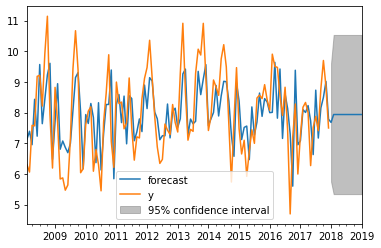

In [53]:
ma_model.plot_predict(1, n+12);

## ARMA

Combines both AR and MA components into one model.

$$\large𝑌𝑡 = 𝜇 + 𝜙∗𝑌𝑡−1 + 𝜃∗𝜖𝑡−1 + 𝜖𝑡$$

In [54]:
# Make data
n = 12*10
mu = 8
phi = 0.7
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + phi*(data[i-1]-mu) + errors[i] + theta*errors[i-1]  if i>1 else mu + phi + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

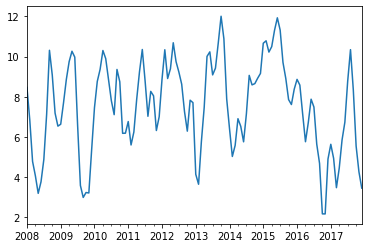

In [55]:
time_series.plot()

In [56]:
arma = ARMA(time_series, order = (1, 1)).fit()
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(1, 1)   Log Likelihood                -175.791
Method:                       css-mle   S.D. of innovations              1.035
Date:                Wed, 25 Nov 2020   AIC                            359.582
Time:                        12:39:38   BIC                            370.732
Sample:                    01-31-2008   HQIC                           364.110
                         - 12-31-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4618      0.497     15.022      0.000       6.488       8.435
ar.L1.y        0.6544      0.072      9.077      0.000       0.513       0.796
ma.L1.y        0.8511      0.055     15.410      0.000       0.743       0.959
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5282           +0.0000j            1.5282            0.0000
MA.1           -1.1749           +0.0000j            1.1749            0.5000
-----------------------------------------------------------------------------
"""

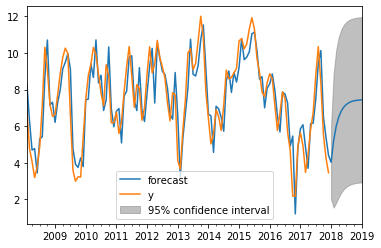

In [58]:
arma.plot_predict(1, n+12);

In [59]:
ar_model = ARMA(time_series, order = (1, 0)).fit()
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(1, 0)   Log Likelihood                -205.582
Method:                       css-mle   S.D. of innovations              1.336
Date:                Wed, 25 Nov 2020   AIC                            417.163
Time:                        12:40:58   BIC                            425.526
Sample:                    01-31-2008   HQIC                           420.559
                         - 12-31-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4152      0.644     11.511      0.000       6.153       8.678
ar.L1.y        0.8171      0.053     15.473      0.000       0.714       0.921
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2239           +0.0000j            1.2239            0.0000
-----------------------------------------------------------------------------
"""

## ARIMA

Combines AR and MA components as well as an <b> Integrated </b> component which accounts for trends.

AR, MA, and ARMA models require stationarity. <br>
ARIMA models can handle non-stationary time series due to the <b>I</b> component.

In [60]:
# create data
n = 12*10
mu = 8
phi = 0.7
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + phi*(data[i-1]-mu) + errors[i] + theta*errors[i-1] + 0.05*i  if i>1 else mu + phi + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

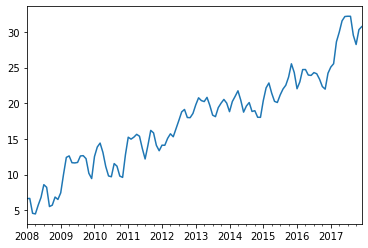

In [61]:
time_series.plot()

In [62]:
from statsmodels.tsa.stattools import adfuller

In [63]:
adfuller(time_series)

(-0.5009929761904063,
 0.8918225782144371,
 8,
 111,
 {'1%': -3.490683082754047,
  '5%': -2.8879516565798817,
  '10%': -2.5808574442009578},
 311.14875043582566)

In [64]:
arma_model = ARMA(time_series, order = (1, 1)).fit()
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(1, 1)   Log Likelihood                -180.843
Method:                       css-mle   S.D. of innovations              1.068
Date:                Wed, 25 Nov 2020   AIC                            369.685
Time:                        12:43:57   BIC                            380.835
Sample:                    01-31-2008   HQIC                           374.213
                         - 12-31-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6098      4.987      3.531      0.001       7.835      27.385
ar.L1.y        0.9713      0.023     42.565      0.000       0.927       1.016
ma.L1.y        0.8381      0.094      8.908      0.000       0.654       1.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0295           +0.0000j            1.0295            0.0000
MA.1           -1.1932           +0.0000j            1.1932            0.5000
-----------------------------------------------------------------------------
"""

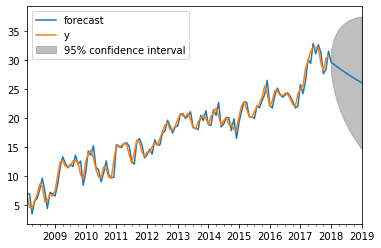

In [65]:
arma_model.plot_predict(1, n + 12);

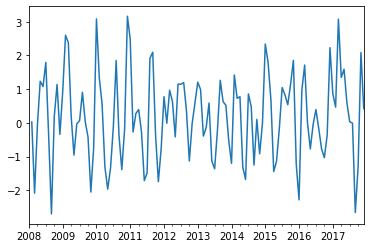

In [66]:
time_series.diff(1).plot()

In [67]:
from statsmodels.tsa.arima_model import ARIMA 

In [68]:
arima_model = ARIMA(time_series, order = (1, 1, 1)).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  119
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -173.254
Method:                       css-mle   S.D. of innovations              1.020
Date:                Wed, 25 Nov 2020   AIC                            354.508
Time:                        12:46:59   BIC                            365.624
Sample:                    02-29-2008   HQIC                           359.022
                         - 12-31-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2029      0.142      1.428      0.156      -0.076       0.481
ar.L1.D.y     -0.3128      0.089     -3.498      0.001      -0.488      -0.138
ma.L1.D.y      1.0000      0.058     17.242      0.000       0.886       1.114
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.1969           +0.0000j            3.1969            0.5000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

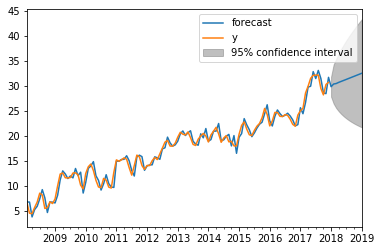

In [69]:
arima_model.plot_predict(1, n+12);

## Finding Correct Value for ARIMA 

In [70]:
p = [0, 1, 2]
q = [0, 1, 2]

for ar in p:
    for ma in q:
        try:
            arima_model = ARIMA(time_series, order = (ar, 1, ma)).fit()
            print(f'({ar}, 1, {ma}) - AIC: {arima_model.aic}')
        except:
            continue

(0, 1, 0) - AIC: 395.5888813169554
(0, 1, 1) - AIC: 360.4590109621308
(0, 1, 2) - AIC: 350.1251917381571
(1, 1, 0) - AIC: 386.3419249731424
(1, 1, 1) - AIC: 354.5075345082635
(1, 1, 2) - AIC: 340.4037842664642
(2, 1, 0) - AIC: 358.0146064909966
(2, 1, 1) - AIC: 355.7171426558363
(2, 1, 2) - AIC: 341.6231347143483


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


## ACF and PACF 

Auto-correlation function (ACF)

- Measures relationship between points and various lags.

Partial auto-correlation function (PACF)

- Measures relationship between points and various lags without the influence of other lags.

| Plot | AR(p) | MA(q) | ARMA(p, q) | 
|------|-------|------|-------|
| ACF    | Tails off | Cuts off after lag q   | Tails Off  | 
| PACF    | Cuts off after lag p  | Tails off   | Tails off  | 

[Rules for reading ACF and PACF plots](https://people.duke.edu/~rnau/411arim3.htm)

Look at a AR(1) time series.  The PACF should show that it tails off after lag 1 

In [71]:
# AR(1)
n = 12*10
constant = 8
slope = 0.7
noise_weight = 1
noise = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(constant + slope*(data[i-1]-constant) + noise[i] if i>1 else constant + slope + noise[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

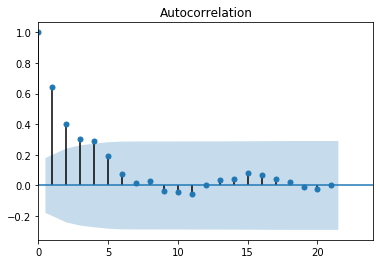

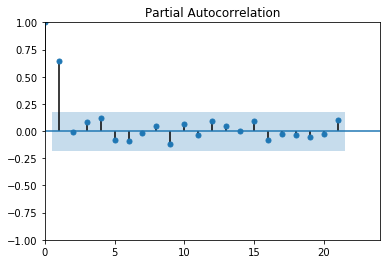

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(time_series); plt.xlim(0,24); plt.show()
plot_pacf(time_series); plt.xlim(0,24); plt.ylim(-1,1);plt.show()

Now looking at a MA(1) model.  ACF should tail off after 1 lag 

In [85]:
n = 12*10
mu = 8
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + theta*errors[i-1] + errors[i] if i>1 else mu + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

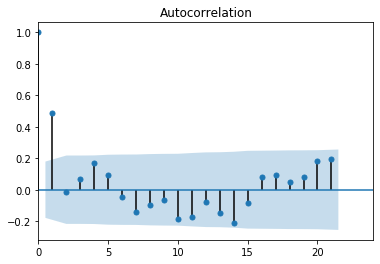

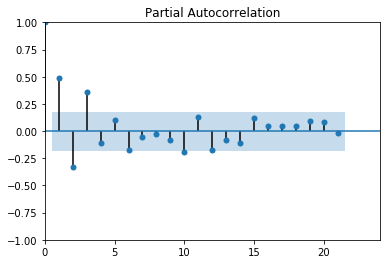

In [86]:
plot_acf(time_series); plt.xlim(0,24); plt.show()
plot_pacf(time_series); plt.xlim(0,24); plt.ylim(-1,1);plt.show()